In [45]:
import sys
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import mne
from matplotlib import pyplot as plt 
from scipy.fft import fft, rfft, ifft, fftfreq, irfft
from scipy import signal 
from datetime import datetime
sys.path.insert(0, os.path.abspath('..'))

In [2]:
EEG_FILE_PATH = r'/content/eye_closed_ExG.csv'

In [41]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [8]:
EEG_CHANNEL_NAMES = ['TimeStamps', 'Fp1', 'Fp2', 'PO3', 'PO4', 'O1', 'O2', 'OZ', 'POZ']
SAMPLE_RATE = 256
CH_TYPES = ['eeg'] * len(EEG_CHANNEL_NAMES)
data = pd.read_csv(EEG_FILE_PATH)

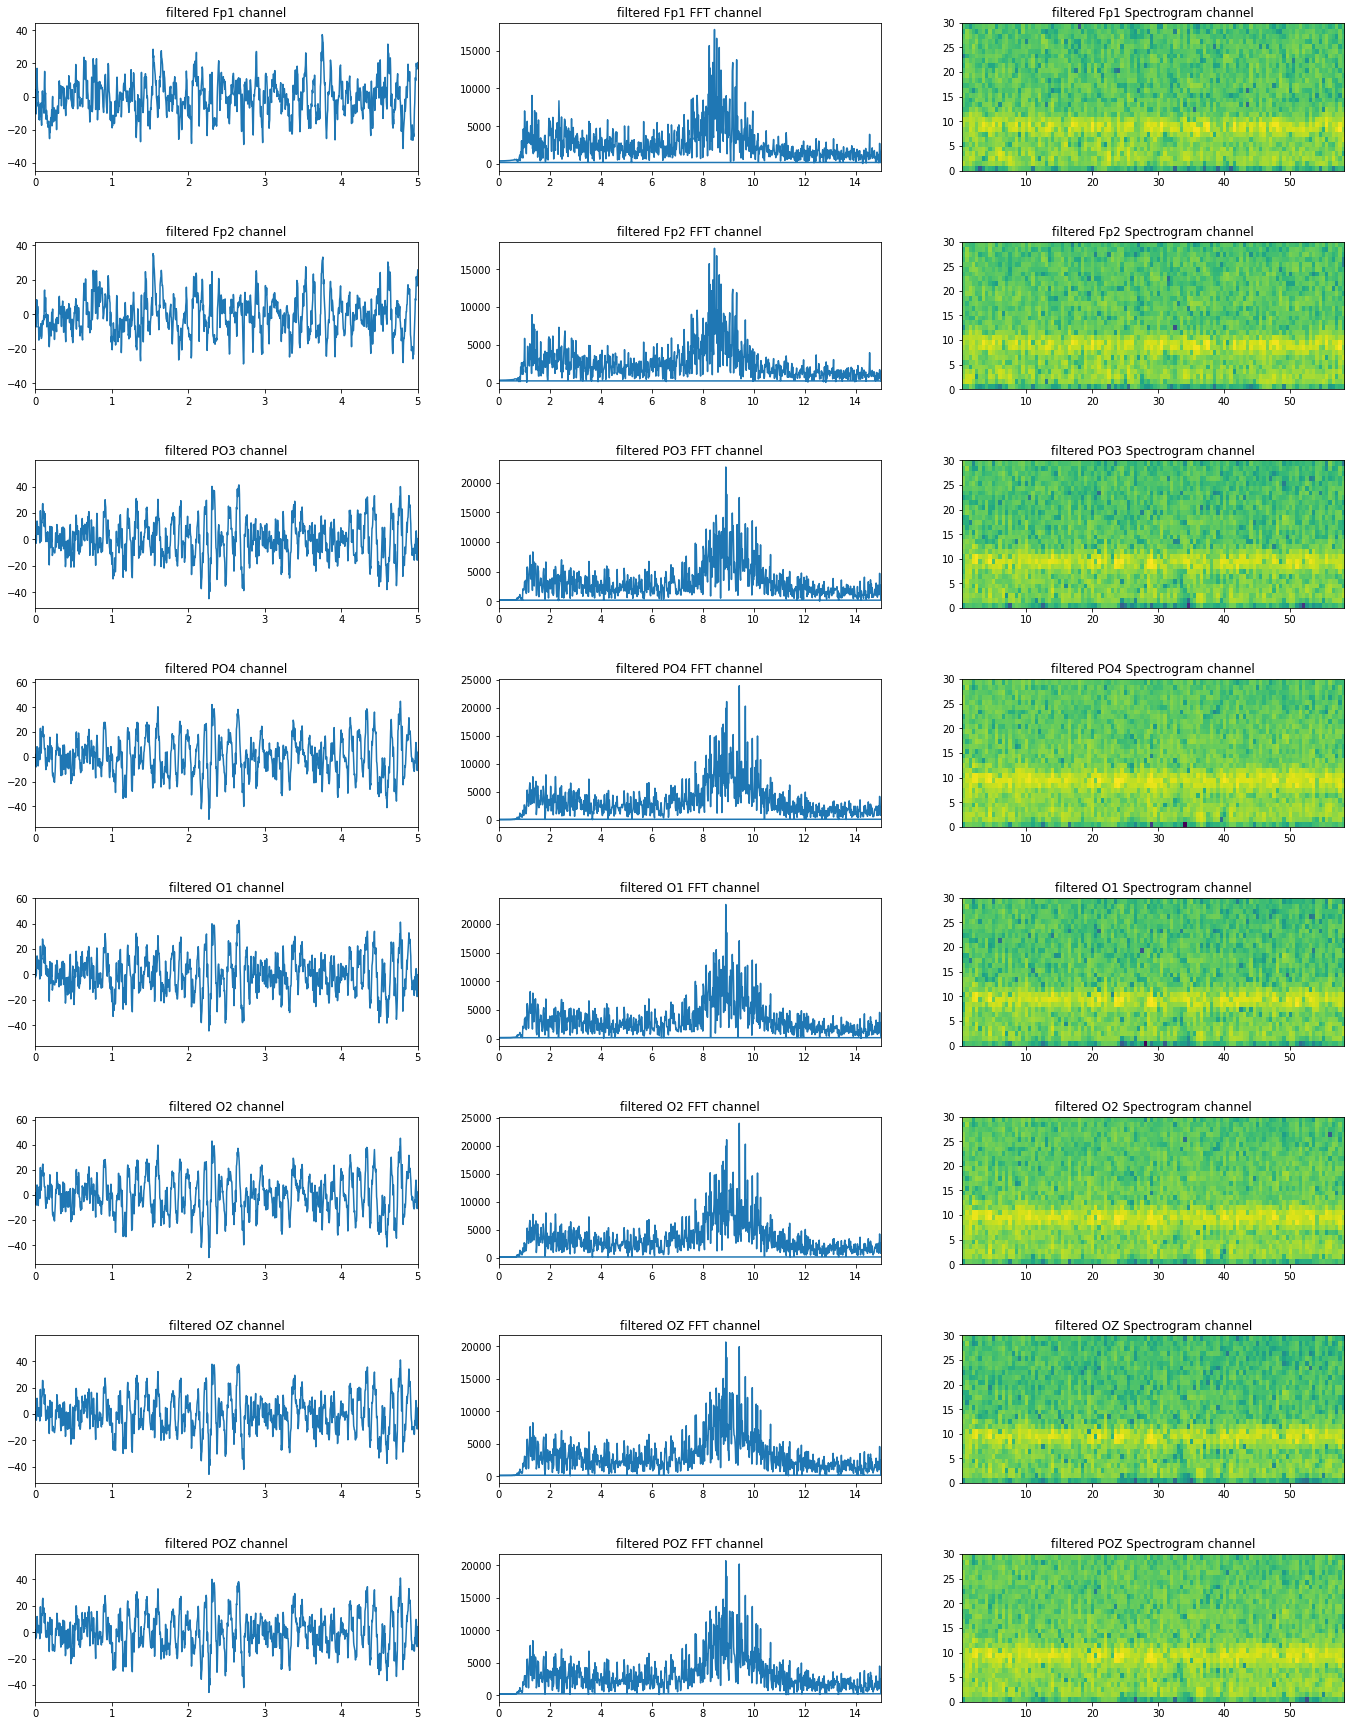

In [74]:
x = data['TimeStamp'].apply(lambda x: x-data['TimeStamp'].iloc[0])

fig, axes = plt.subplots(8,3, figsize=(20, 25))

fig.tight_layout(pad=5.0)
filtered_y = np.empty((len(x), 8))
for i in range(1,9):
  filtered_y[:,i-1] = butter_highpass_filter(data.iloc[:,i], cutoff=1, fs=SAMPLE_RATE, order=5)

  N = x.shape[0]
  xf = fftfreq(N, 1 / SAMPLE_RATE)
  yf = np.abs(fft(filtered_y[:,i-1]))

  axes[i-1, 0].set_title(f'filtered {EEG_CHANNEL_NAMES[i-1]} channel')
  axes[i-1, 0].plot(x, filtered_y[:, i-1])
  axes[i-1, 0].set_xlim(0, 5)


  axes[i-1, 1].set_title(f'filtered {EEG_CHANNEL_NAMES[i-1]} FFT channel')
  axes[i-1, 1].plot(xf, yf)
  axes[i-1, 1].set_xlim(0, 15)


  axes[i-1, 2].set_title(f'filtered {EEG_CHANNEL_NAMES[i-1]} Spectrogram channel')
  axes[i-1, 2].specgram(filtered_y[:,i-1], Fs=256)
  axes[i-1, 2].set_ylim(0,30)